# 2. Neural network from scratch

Task (a): Initial Output (z and a values)
Neuron 3: z = -0.0500, a = 0.0000
Neuron 4: z = 0.3400, a = 0.3400
Neuron 5: z = 0.1680, a = 0.1680
Neuron 6: z = 0.0320, a = 0.0320

Task (b): Initial Sum of Squared Errors
SSE: 0.20922400000000002

Task (c): Error Delta (δ) for Each Processing Neuron
Neuron 3: δ = -0.0000
Neuron 4: δ = 0.0328
Neuron 5: δ = 0.5320
Neuron 6: δ = 0.3680

Task (d): Sensitivity of Error to Changes in Each Weight (Partial Derivatives)
∂E/∂w(1, 3) = -0.0000
∂E/∂w(2, 3) = -0.0000
∂E/∂w(1, 4) = 0.0098
∂E/∂w(2, 4) = 0.0197
∂E/∂w(3, 5) = 0.0000
∂E/∂w(4, 5) = 0.1809
∂E/∂w(3, 6) = 0.0000
∂E/∂w(4, 6) = 0.1251

Task (e): Updated Weights and Biases
w(1, 3) = -0.1000
w(2, 3) = -0.2000
w(1, 4) = 0.1990
w(2, 4) = 0.2980
w(3, 5) = -0.1000
w(4, 5) = 0.1819
w(3, 6) = 0.1000
w(4, 6) = -0.2125
bias 3 = 0.1000
bias 4 = 0.0967
bias 5 = 0.0468
bias 6 = 0.0632

Task (f): New Output (z and a values) with Updated Weights
Neuron 3: z = -0.0500, a = 0.0000
Neuron 4: z = 0.3352, a = 0.3352
N

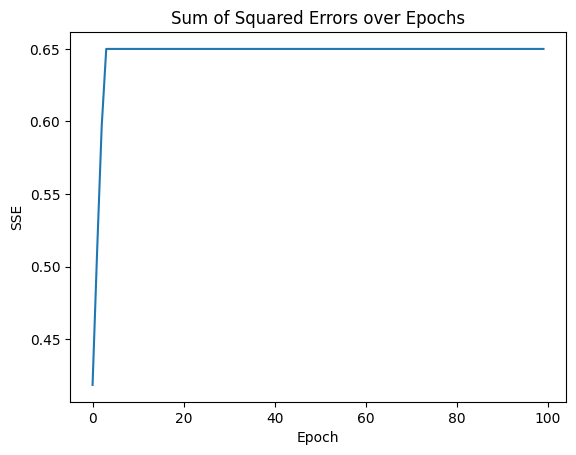

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define the ReLU activation function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Initialize the network parameters
inputs = np.array([0.3, 0.6])
desired_outputs = np.array([0.7, 0.4])
weights = {
    (1, 3): -0.1,  # w3,1
    (2, 3): -0.2,  # w3,2
    (1, 4): 0.2,   # w4,1
    (2, 4): 0.3,   # w4,2
    (3, 5): -0.1,  # w5,3
    (4, 5): 0.2,   # w5,4
    (3, 6): 0.1,   # w6,3
    (4, 6): -0.2   # w6,4
}
biases = {3: 0.1, 4: 0.1, 5: 0.1, 6: 0.1}
learning_rate = 0.1

# Forward pass function
def forward_pass(inputs, weights, biases):
    z_values = {}
    a_values = {1: inputs[0], 2: inputs[1]}
    for i in [3, 4, 5, 6]:
        z = sum(weights.get((j, i), 0) * a_values.get(j, 0) for j in range(1, i)) + biases.get(i, 0)
        a = relu(z)
        z_values[i] = z
        a_values[i] = a
    return z_values, a_values

# Backward pass function
def backward_pass(z_values, a_values, weights, desired_outputs):
    deltas = {}
    gradients = {}
    sse = 0
    for i in [5, 6]:
        error = desired_outputs[i - 5] - a_values[i]
        sse += error ** 2
        deltas[i] = error * relu_derivative(z_values[i])
    for i in [4, 3]:
        deltas[i] = sum(deltas[j] * weights[(i, j)] for j in [5, 6]) * relu_derivative(z_values[i])
    for i, j in weights:
        gradients[(i, j)] = a_values[i] * deltas[j]
    return gradients, sse, deltas

# Running the forward pass to verify initial output (task a)
initial_z_values, initial_a_values = forward_pass(inputs, weights, biases)

# Running the backward pass to verify tasks (b), (c), and (d)
initial_gradients, initial_sse, initial_deltas = backward_pass(initial_z_values, initial_a_values, weights, desired_outputs)
initial_sse = initial_sse/2
# Displaying the initial output (task a)
print("Task (a): Initial Output (z and a values)")
for i in [3, 4, 5, 6]:
    print(f"Neuron {i}: z = {initial_z_values[i]:.4f}, a = {initial_a_values[i]:.4f}")

# Displaying the initial SSE (task b)
print("\nTask (b): Initial Sum of Squared Errors")
print("SSE:", initial_sse)

# Displaying the error delta (δ) for each processing neuron (task c)
print("\nTask (c): Error Delta (δ) for Each Processing Neuron")
for i in [3, 4, 5, 6]:
    print(f"Neuron {i}: δ = {initial_deltas[i]:.4f}")

# Displaying the sensitivity of error to changes in each weight (task d)
print("\nTask (d): Sensitivity of Error to Changes in Each Weight (Partial Derivatives)")
for (i, j), gradient in initial_gradients.items():
    print(f"∂E/∂w{i,j} = {gradient:.4f}")

# Updating the weights and biases (task e)
updated_weights = weights.copy()
updated_biases = biases.copy()
for i, j in weights:
    updated_weights[(i, j)] -= learning_rate * initial_gradients[(i, j)]
for i in initial_deltas:
    updated_biases[i] -= learning_rate * initial_deltas[i]

# Continuing from where the code was interrupted

# Displaying the updated weights and biases (task e)
print("\nTask (e): Updated Weights and Biases")
for (i, j), weight in updated_weights.items():
    print(f"w{i,j} = {weight:.4f}")
for i, bias in updated_biases.items():
    print(f"bias {i} = {bias:.4f}")

# Running the forward pass again with updated weights and biases to verify tasks (f), (g), (h), and (i)
new_z_values, new_a_values = forward_pass(inputs, updated_weights, updated_biases)
new_gradients, new_sse, new_deltas = backward_pass(new_z_values, new_a_values, updated_weights, desired_outputs)
new_sse = new_sse/2
# Displaying the new output after weight update (task f)
print("\nTask (f): New Output (z and a values) with Updated Weights")
for i in [3, 4, 5, 6]:
    print(f"Neuron {i}: z = {new_z_values[i]:.4f}, a = {new_a_values[i]:.4f}")

# Displaying the new SSE after weight update (task g)
print("\nTask (g): New Sum of Squared Errors with Updated Weights")
print("New SSE:", new_sse)

# Calculating and displaying the reduction in error with new weights (task h)
error_reduction = initial_sse - new_sse
print("\nTask (h): Reduction in Error with New Weights")
print("Error Reduction:", error_reduction)

# Plotting the sum of squared errors over training epochs (task i)
plt.plot(sse_values)
plt.title('Sum of Squared Errors over Epochs')
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.show()


## 3. Develop the neural network program based on the network description in Q2 but with the logistic (sigmoid) activation function, randomly sampled initial weighs from a range of [-0.5, +0.5] , and 100 epochs. Generate a plot showing the sum of squared errors of the network changed during training.

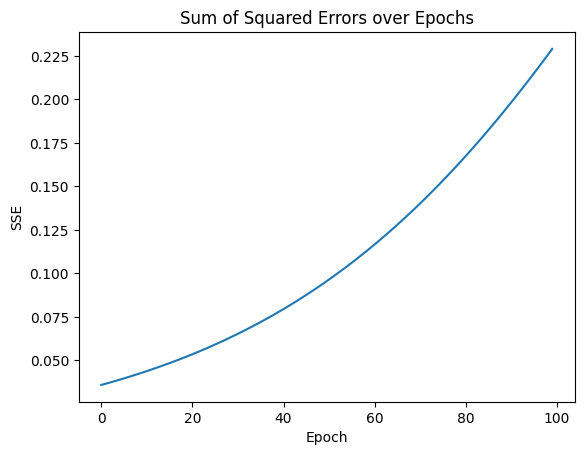

In [18]:
#In the code provided, the forward pass (and consequently the backward pass) occurs more than twice. Specifically, it happens once per epoch for a total of 100 epochs to plot the SSE
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Initialize the network with randomly sampled weights
np.random.seed(0)  # For reproducibility
weights = {
    (1, 3): np.random.uniform(-0.5, 0.5),
    (2, 3): np.random.uniform(-0.5, 0.5),
    (1, 4): np.random.uniform(-0.5, 0.5),
    (2, 4): np.random.uniform(-0.5, 0.5),
    (3, 5): np.random.uniform(-0.5, 0.5),
    (4, 5): np.random.uniform(-0.5, 0.5),
    (3, 6): np.random.uniform(-0.5, 0.5),
    (4, 6): np.random.uniform(-0.5, 0.5)
}
biases = {3: np.random.uniform(-0.5, 0.5), 4: np.random.uniform(-0.5, 0.5), 5: np.random.uniform(-0.5, 0.5), 6: np.random.uniform(-0.5, 0.5)}

# Network parameters
inputs = np.array([0.3, 0.6])
desired_outputs = np.array([0.7, 0.4])
learning_rate = 0.1

# Forward pass function
def forward_pass(inputs, weights, biases):
    z_values = {}
    a_values = {1: inputs[0], 2: inputs[1]}
    for i in [3, 4, 5, 6]:
        z = sum(weights.get((j, i), 0) * a_values.get(j, 0) for j in range(1, i)) + biases.get(i, 0)
        a = sigmoid(z)
        z_values[i] = z
        a_values[i] = a
    return z_values, a_values

# Backward pass function
def backward_pass(z_values, a_values, weights, desired_outputs):
    deltas = {}
    gradients = {}
    sse = 0
    for i in [5, 6]:
        error = desired_outputs[i - 5] - a_values[i]
        sse += error ** 2
        deltas[i] = error * sigmoid_derivative(z_values[i])
    for i in [4, 3]:
        deltas[i] = sum(deltas[j] * weights[(i, j)] for j in [5, 6]) * sigmoid_derivative(z_values[i])
    for i, j in weights:
        gradients[(i, j)] = a_values[i] * deltas[j]
    return gradients, sse, deltas

# Training the network
sse_values = []
for epoch in range(100):
    z_values, a_values = forward_pass(inputs, weights, biases)
    gradients, sse, deltas = backward_pass(z_values, a_values, weights, desired_outputs)
    sse_values.append(sse)

    # Update weights and biases
    for i, j in weights:
        weights[(i, j)] -= learning_rate * gradients[(i, j)]
    for i in deltas:
        biases[i] -= learning_rate * deltas[i]

# Plotting the SSE
plt.plot(sse_values)
plt.title('Sum of Squared Errors over Epochs')
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.show()

